In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# inputs
first_closest_x_distance = ctrl.Antecedent(np.arange(-980, 981, 1), 'first_closest_x_distance')
second_closest_x_distance = ctrl.Antecedent(np.arange(-980, 981, 1), 'second_closest_x_distance')
closest_wall_distance = ctrl.Antecedent(np.arange(-500, 501, 1), 'closest_wall_distance')

# output
move = ctrl.Consequent(np.arange(-1, 1.01, 0.01), 'move')

In [4]:
# inputs membership functions
first_closest_x_distance['far_left'] = fuzz.trapmf(first_closest_x_distance.universe, [-980, -980, -500, -250])
first_closest_x_distance['close_left'] = fuzz.trimf(first_closest_x_distance.universe, [-350, -1, -1])
first_closest_x_distance['close_right'] = fuzz.trimf(first_closest_x_distance.universe, [0, 0, 350])
first_closest_x_distance['far_right'] = fuzz.trapmf(first_closest_x_distance.universe, [250, 500, 980, 980])

second_closest_x_distance['far_left'] = fuzz.trapmf(second_closest_x_distance.universe, [-980, -980, -400, -150])
second_closest_x_distance['close_left'] = fuzz.trimf(second_closest_x_distance.universe, [-200, -1, -1])
second_closest_x_distance['close_right'] = fuzz.trimf(second_closest_x_distance.universe, [0, 0, 200])
second_closest_x_distance['far_right'] = fuzz.trapmf(second_closest_x_distance.universe, [150, 400, 980, 980])

closest_wall_distance['far_left'] = fuzz.trapmf(closest_wall_distance.universe, [-500, -500, -150, -50])
closest_wall_distance['close_left'] = fuzz.trimf(closest_wall_distance.universe, [-60, -1, -1])
closest_wall_distance['close_right'] = fuzz.trimf(closest_wall_distance.universe, [0, 0, 60])
closest_wall_distance['far_right'] = fuzz.trapmf(closest_wall_distance.universe, [50, 150, 500, 500])

In [5]:
# output membership functions
move['move_left'] = fuzz.trimf(move.universe, [-1, -1, -0.1])
move['move_slightly_left'] = fuzz.trimf(move.universe, [-0.8, -0.5, -0.1])
move['do_not_move'] = fuzz.trimf(move.universe, [-0.2, 0, 0.2])
move['move_slightly_right'] = fuzz.trimf(move.universe, [0.1, 0.5, 0.8])
move['move_right'] = fuzz.trimf(move.universe, [0.1, 1, 1])

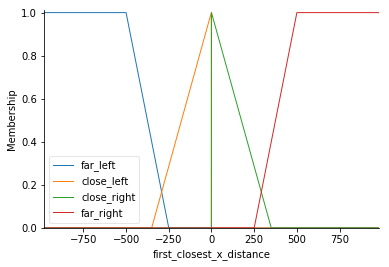

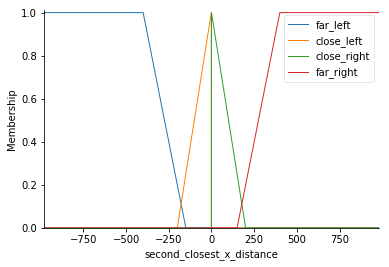

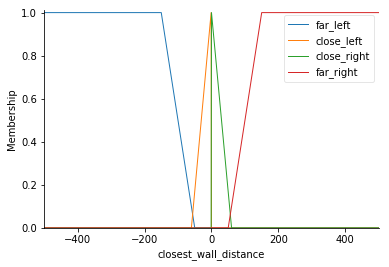

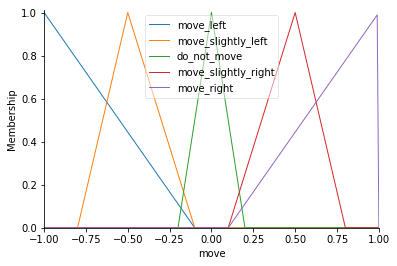

In [7]:
import matplotlib
matplotlib.use('TkAgg')
first_closest_x_distance.view()
second_closest_x_distance.view()
closest_wall_distance.view()
move.view()

In [6]:
# rules
rule_list = list()

# closest obstacle close_left rules
rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'],
                           move['move_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           second_closest_x_distance['close_left'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           second_closest_x_distance['far_left'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           second_closest_x_distance['far_right'],
                           move['move_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           second_closest_x_distance['close_right'],
                           move['move_slightly_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           closest_wall_distance['far_left'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           closest_wall_distance['close_left'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           closest_wall_distance['far_right'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           closest_wall_distance['close_right'],
                           move['move_left']))

# closest obstacle close_right rules
rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'],
                           move['move_left']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           second_closest_x_distance['close_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           second_closest_x_distance['far_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           second_closest_x_distance['far_left'],
                           move['move_left']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           second_closest_x_distance['close_left'],
                           move['move_slightly_left']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           closest_wall_distance['far_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           closest_wall_distance['close_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           closest_wall_distance['far_left'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           closest_wall_distance['close_left'],
                           move['move_right']))

# closest obstacle far_left rules
rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'],
                           move['move_slightly_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           second_closest_x_distance['far_left'],
                           move['move_slightly_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           second_closest_x_distance['close_left'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           second_closest_x_distance['far_right'],
                           move['move_slightly_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           second_closest_x_distance['close_right'],
                           move['move_left']))

rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           closest_wall_distance['far_left'],
                           move['move_slightly_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           closest_wall_distance['close_left'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           closest_wall_distance['far_right'],
                           move['do_not_move']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_left'] &
                           closest_wall_distance['close_right'],
                           move['move_slightly_left']))

# closest obstacle far_right rules
rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'],
                           move['move_slightly_left']))

rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           second_closest_x_distance['far_right'],
                           move['move_slightly_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           second_closest_x_distance['close_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           second_closest_x_distance['far_left'],
                           move['move_slightly_left']))

rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           second_closest_x_distance['close_left'],
                           move['move_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           closest_wall_distance['far_right'],
                           move['move_slightly_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           closest_wall_distance['close_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           closest_wall_distance['far_left'],
                           move['do_not_move']))
rule_list.append(ctrl.Rule(first_closest_x_distance['far_right'] &
                           closest_wall_distance['close_left'],
                           move['move_slightly_right']))

# close walls rules
rule_list.append(ctrl.Rule(closest_wall_distance['close_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(closest_wall_distance['close_left'],
                           move['move_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           second_closest_x_distance['close_right'] &
                           closest_wall_distance['close_left'],
                           move['move_right']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_right'] &
                           second_closest_x_distance['close_left'] &
                           closest_wall_distance['close_left'],
                           move['move_right']))

rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           second_closest_x_distance['close_left'] &
                           closest_wall_distance['close_right'],
                           move['move_left']))
rule_list.append(ctrl.Rule(first_closest_x_distance['close_left'] &
                           second_closest_x_distance['close_right'] &
                           closest_wall_distance['close_right'],
                           move['move_left']))

movement_control = ctrl.ControlSystem(rule_list)

In [7]:
movement_control = ctrl.ControlSystem(rule_list)

In [8]:
movement = ctrl.ControlSystemSimulation(movement_control)

In [16]:
# computing movement
movement.input['first_closest_x_distance'] = -30
movement.input['second_closest_x_distance'] = -170
movement.input['closest_wall_distance'] = 400

movement.compute()

0.695217841275719


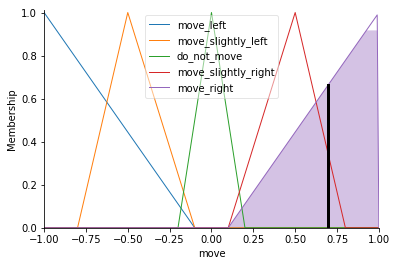

In [17]:
print(movement.output['move'])
move.view(sim=movement)
